In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv 

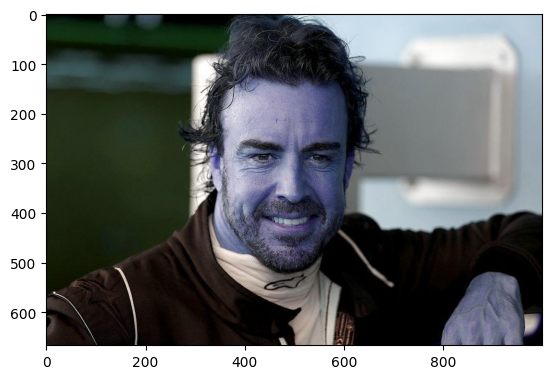

In [2]:
imagen = cv.imread('../img/test/6.jpg')
plt.imshow(imagen);

In [3]:
# Copiamos la imagen para trabajar sobre ella copiada
imagen_copy = np.copy(imagen)

Tenemos 667  pixeles en el eje de las X
Tenemos 1000  pixeles en el eje de las Y


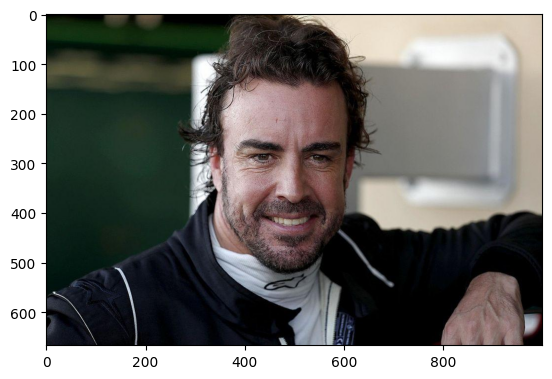

In [4]:
# Convertimos el color a RGB ya que matplotlib, es como mejor la reconoce.
imagen_copy = cv.cvtColor(imagen_copy, cv.COLOR_BGR2RGB)
print('Tenemos',imagen_copy.shape[0], ' pixeles en el eje de las X')
print('Tenemos',imagen_copy.shape[1], ' pixeles en el eje de las Y')

# Mostramos la imagen 
x = plt.imshow(imagen_copy)

## Seleccion de pixeles

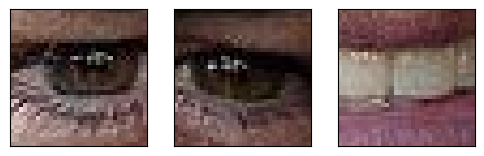

In [5]:
pixeles = [ [290,435], [290,550], [420,500]]

examples = []

for pixel in pixeles:

    #Imagen[desde:hasta, desde:hasta]

    example = imagen_copy[pixel[0]-16:pixel[0]+16,pixel[1]-16:pixel[1]+16]
    examples.append(example)

fig = plt.figure(0,(6,4))

for i, example in enumerate (examples):
    #Dos filas y tres columnas 
    ax = fig.add_subplot(2,3,i+1)
    # Mostra imagen con matplotlib
    ax.imshow(example,cmap='gray', interpolation = 'none', vmin =0, vmax=200)
    ax.set_xticks([])
    ax.set_yticks([])

## Importamos la foto

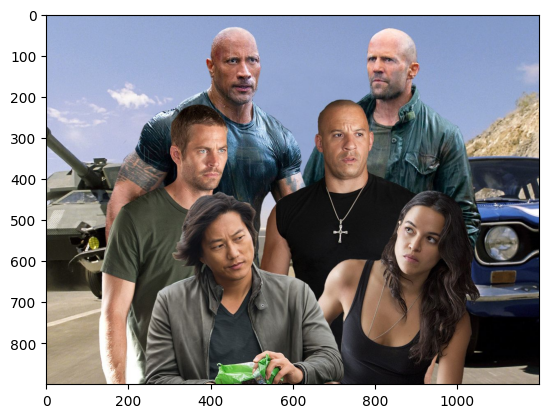

In [2]:
#Cargamos una foto y la convertimos en RGB

img = cv.imread('../img/test/23.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img);


In [8]:
img.shape

(900, 1200, 3)

## Cambiamos la posición de la foto 

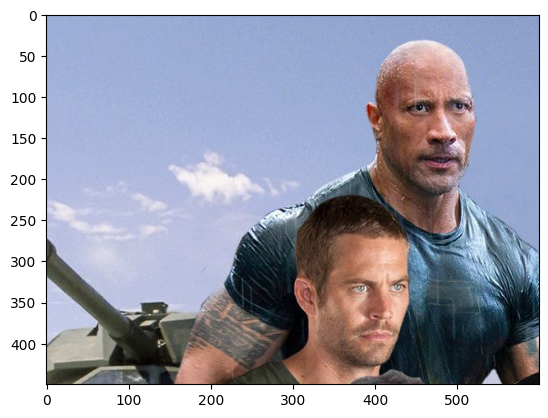

In [9]:
cropped_1 = img[:img.shape[0]//2,:img.shape[1]//2]
plt.imshow(cropped_1);


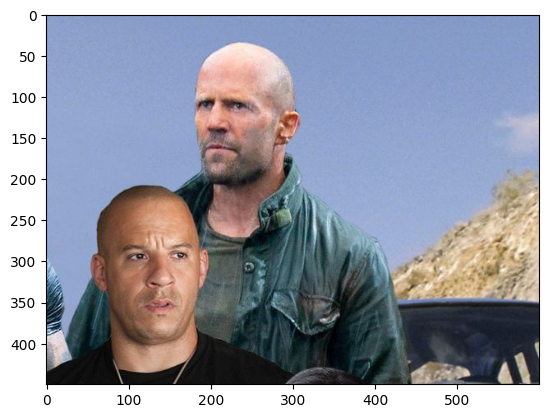

In [10]:
cropped_2 = img[:img.shape[0]//2,img.shape[1]//2:]
plt.imshow(cropped_2);

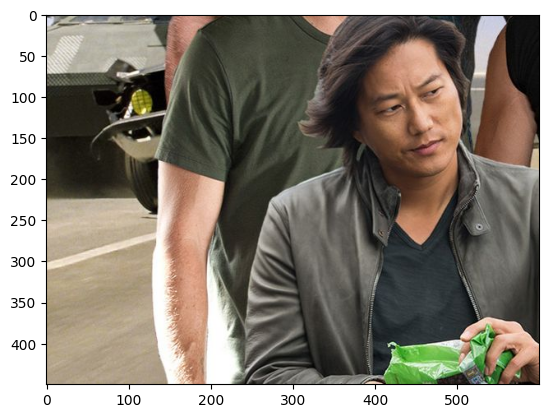

In [11]:
cropped_3 = img[img.shape[0]//2:,:img.shape[1]//2]
plt.imshow(cropped_3);

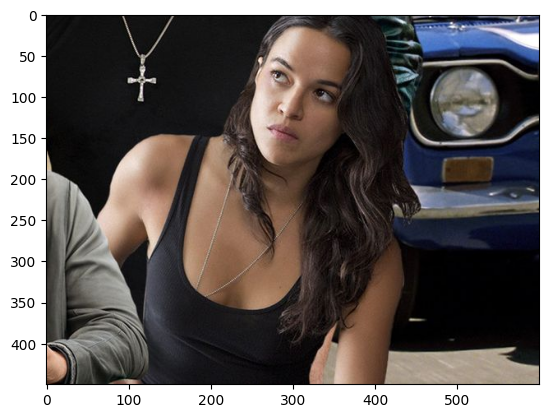

In [12]:
cropped_4 = img[img.shape[0]//2:,img.shape[1]//2:]
plt.imshow(cropped_4);

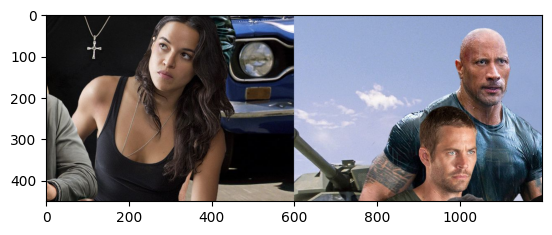

In [13]:
row_1 = cv.hconcat([cropped_4,cropped_1])
plt.imshow(row_1);


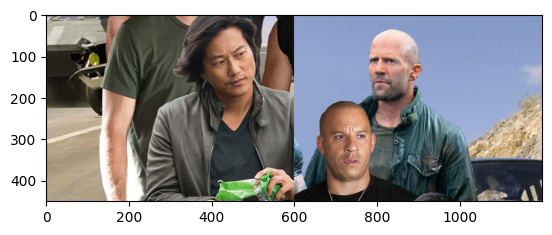

In [14]:
row_2 = cv.hconcat([cropped_3, cropped_2])
plt.imshow(row_2);

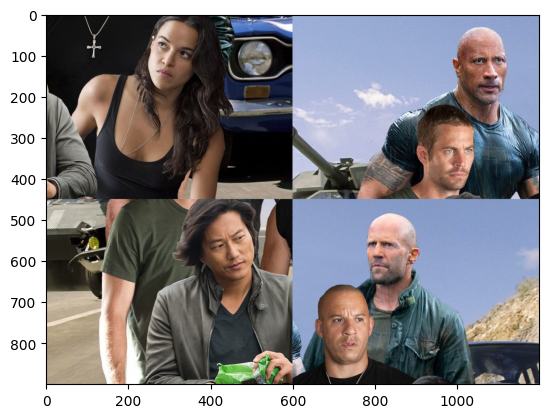

In [15]:
new_img = cv.vconcat([row_1, row_2])
plt.imshow(new_img);

## Recorte foto 

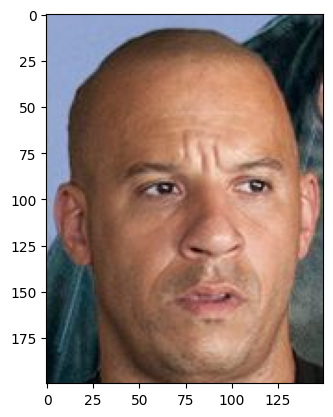

In [16]:
# Seleccionamos un recorte de nuestra foto
# Imagen[desdeY:hastaY, desdeX:hastX]

cara_vin = img[200:400, 650:800]
plt.imshow(cara_vin, cmap='gray')


## Borrosa

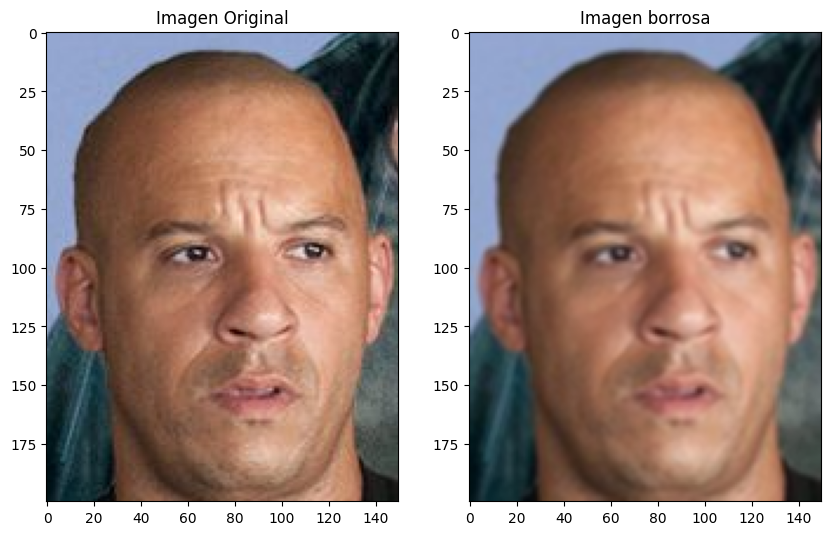

In [17]:
# Hacemos borrosa la imagen y las visualizamos
img_filtered = cv.blur(cara_vin, (3, 3))

fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(cara_vin, cmap='gray')

plt.subplot(122)
img_filtered = cv.blur(cara_vin, (3, 3))
plt.title('Imagen borrosa')
plt.imshow(img_filtered);

## Ruido

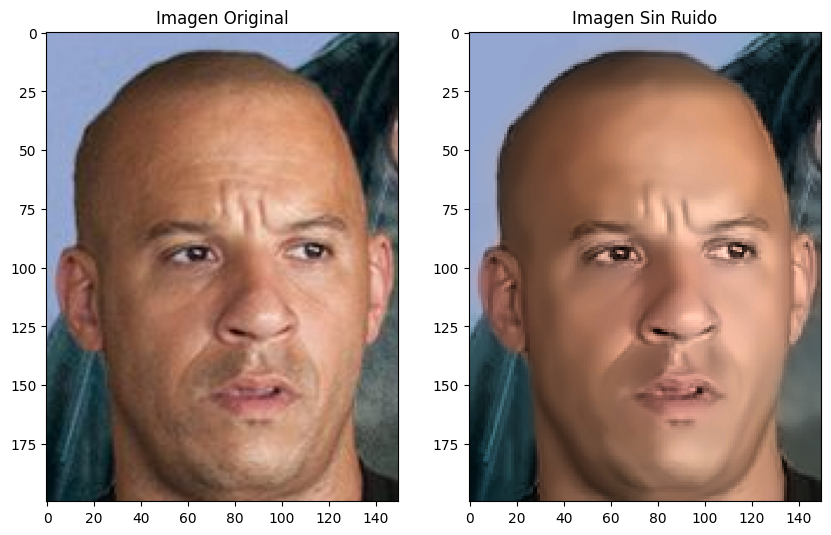

In [18]:
# Destacar o resaltar lineas horizontales

fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(cara_vin, cmap='gray')

plt.subplot(122)
#Desnoised=cv.cvtColor(zona, cv.COLOR_BGR2RGB)
Desnoised = cv.fastNlMeansDenoisingColored(cara_vin, None, 5, 10, 7, 21)
plt.title('Imagen Sin Ruido')
plt.imshow(Desnoised, cmap = 'gray', interpolation='none');


In [19]:
cara_vin.shape

(200, 150, 3)

## Rotar

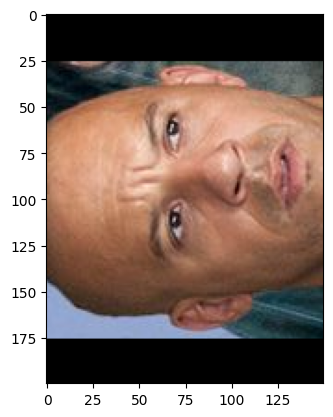

In [20]:
widht = 150
height = 200
centro = (widht/2, height/2)

# cv.getRotationMatrix2D(CENTER, ANGLE, SCALE)
Matrix = cv.getRotationMatrix2D(centro, 90, 1.0)

Rotar = cv.warpAffine(cara_vin, Matrix,(widht, height))
plt.imshow(Rotar);

## Rectangulos y letras

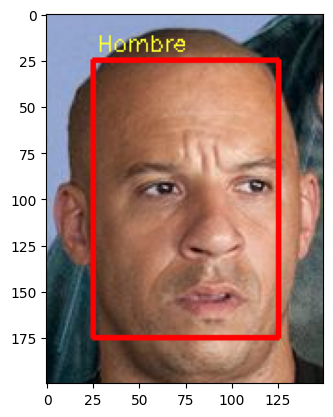

In [21]:
# Colocar el texto 

# cv.putText(imagen, "Texto" punto de inicio(x,y), cv.Font_Italic, escala, color,2)
detectar = np.copy(cara_vin)
cv.putText(detectar,'Hombre', (27,20), cv.FONT_ITALIC,0.4,(255,255,50),1)
# cv.rectangle(imagen, (x,y), (x,y), color(255,0,0), grosor)
cv.rectangle(detectar,(25,25),(125,175),(255,0,0),2)

# Mostramos
plt.imshow(detectar);

# Añadir formas

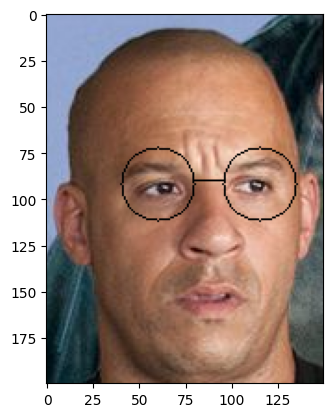

In [22]:
# Vamos a dibujar unas gafas a Vin diesel
gafa = np.copy(cara_vin)
#cv.Circle(imagen, center(x,y), radio, color, grosor)

cv.circle(gafa, (60,92), 20, (0,0,0),1)
cv.circle(gafa, (115,92), 20, (0,0,0),1)

#cv.line(imagen, desde(x,y), hasta(x,y), color, grosor)

cv.line(gafa, (79,90), (96,90),(0,0,0),1)

plt.imshow(gafa);

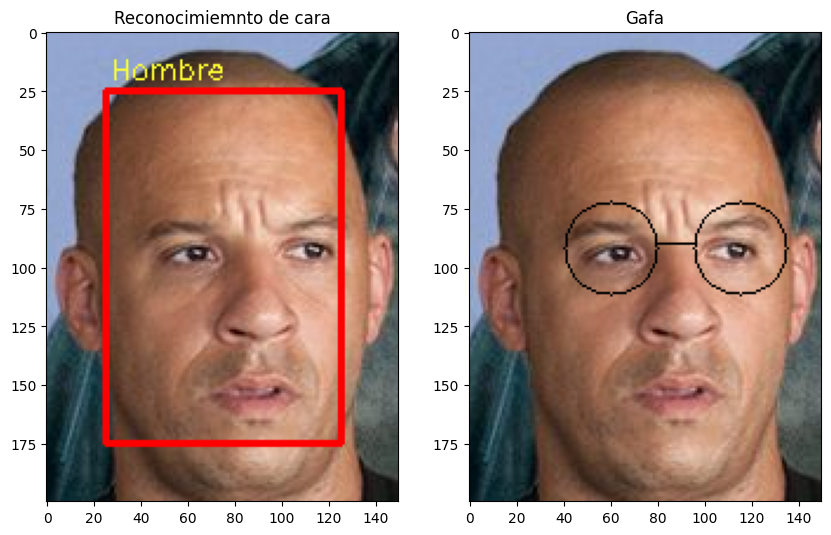

In [23]:
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Reconocimiemnto de cara')
plt.imshow(detectar)

plt.subplot(122)
plt.title('Gafa')
plt.imshow(gafa);


In [24]:
fig.savefig('figure5.png')

    # En python se ejecuta mejor el reconocimiento de caras, porque aqui se rompe el kernel

In [2]:
import os
import cv2

face_cascade = cv2.CascadeClassifier("../xml/haarcascade_frontalface_default.xml")

# Read the input image
img = cv2.imread("../img/test/23.jpeg")

# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Con esto conseguimos difuminar la imagen y asi detectar mejor las imagenes
img_filtered = cv2.blur(img, (3, 3))

# Detect faces
faces = face_cascade.detectMultiScale(img_filtered, 1.1, 4)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the output
cv2.imshow('img', img)
cv2.waitKey(5)

-1

: 

In [ ]:
# img = cv.imread('../img/test/23.jpeg')
# cv.imshow('Grupo de 4 personas', img)

# #Lo convertimos a gris 
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# # La aplicamos una reduccion de tamaño
# img_small = cv.resize(gray, (800, 400))

# #Con esto conseguimos difuminar la imagen y asi detectar mejor las imagenes
# img_filtered = cv.blur(img_small, (3, 3))

# cv.imshow('Personas en gris', img_filtered)

# # Aqui llamamos a nuestro modelo entrenado para reconocer caras
# haar_cascade = cv.CascadeClassifier('../xml/haarcascade_frontalface_default.xml')

# faces_rect = haar_cascade.detectMultiScale(img_small, scaleFactor=1.01, minNeighbors=5, minSize=(50,50))

# for (x,y,w,h) in faces_rect:
#     cv.rectangle(img, (x,y), (x+w,y+h), (255,0,0), thickness=2)

# plt.imshow('Caras detectadas', img)
# plt.waitKey(0)

# 1. Ejer de reconocimiento de coches en un video live.

Crear un codigo para detectar coches en el video que esta en static/video1.avi 

Tenemos que conseguir dectectar todos los coches que pasen en el video, durante los minutos que dure, y a su vez sacar un conteo de coches que hay.

Posibles usos: 

- Medir trafico de clientes en un lugar determinado



## Ejercicio de matriculas bucle for 

https://www.kaggle.com/datasets/andrewmvd/car-plate-detection?select=images

https://www.youtube.com/watch?v=Ai3VmTWeXXk&ab_channel=LuisM